Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Data Collection and Processing

In [4]:
# loading the csv data to a Pandas DataFrame
heart = pd.read_csv('/content/heart.csv')

# New Section

In [5]:
# print first 5 rows of the dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [6]:
# print last 5 rows of the dataset
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0,2,1
1021,60,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1,3,0
1022,47,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1,2,0
1023,50,0,0,110.0,254.0,0,0,159.0,0,0.0,2,0,2,1
1024,54,1,0,120.0,188.0,0,1,113.0,0,1.4,1,1,3,0


In [7]:
# statistical measures about the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1019.00000,1023.000000,1025.000000,1025.000000,1021.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.66634,245.944282,0.149268,0.529756,149.173359,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.52967,51.615220,0.356527,0.527878,23.006442,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# number of rows and columns in the dataset
heart.shape

(1025, 14)

In [9]:
# getting the informations about the data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1019 non-null   float64
 4   chol      1023 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1021 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 112.2 KB


In [10]:
# checking for missing values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    6
chol        2
fbs         0
restecg     0
thalach     4
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heart[['trestbps']])
heart['trestbps'] = impute.transform(heart[['trestbps']])

impute.fit(heart[['chol']])
heart['chol'] = impute.transform(heart[['chol']])

impute.fit(heart[['thalach']])
heart['thalach'] = impute.transform(heart[['thalach']])

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# checking the distribution of Target Variable
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [14]:
X = heart.drop(columns='target', axis=1)
Y = heart['target']

In [15]:
print(X)

      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0     125.0  212.0    0        1    168.0      0      1.0   
1      53    1   0     140.0  203.0    1        0    155.0      1      3.1   
2      70    1   0     145.0  174.0    0        1    125.0      1      2.6   
3      61    1   0     148.0  203.0    0        1    161.0      0      0.0   
4      62    0   0     138.0  294.0    1        1    106.0      0      1.9   
...   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
1020   59    1   1     140.0  221.0    0        1    164.0      1      0.0   
1021   60    1   0     125.0  258.0    0        0    141.0      1      2.8   
1022   47    1   0     110.0  275.0    0        0    118.0      1      1.0   
1023   50    0   0     110.0  254.0    0        0    159.0      0      0.0   
1024   54    1   0     120.0  188.0    0        1    113.0      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0

In [16]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training data & Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [19]:
#Scalling
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

Logistic Regression

In [20]:
# Logestic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [21]:
# Decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [22]:
# Neural Network classifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

Model Evaluation

Accuracy Score

In [23]:
# Accurancy of Logestic regression
score1 = accuracy_score(Y_test, predictions)
print("The Training accuracy of Logestic regression is: {:.2f}".format(model.score(X_train, Y_train)))
print("The Test accuracy of Logestic regression is: {:.2f}".format(score1))

The Training accuracy of Logestic regression is: 0.85
The Test accuracy of Logestic regression is: 0.80


In [24]:
# Accurancy of Decision tree classifier
score2 = accuracy_score(y_pred,Y_test)
print("The Training accuracy of Decision Tree Classifier is: {:.2f}".format(clf.score(X_train, Y_train)))
print("The Test accuracy of Decision Tree Classifier is {:.2f}".format(score2))

The Training accuracy of Decision Tree Classifier is: 1.00
The Test accuracy of Decision Tree Classifier is 1.00


In [25]:
# Accurancy of Neural Network Classifier
score3 = nnc.score(X_test, Y_test)
print("The Training accuracy of Neural Network Classifier is: {:.2f}".format(nnc.score(X_train, Y_train)))
print("The Test accuracy of Neural Network is: {:.2f}".format(score3))

The Training accuracy of Neural Network Classifier is: 0.85
The Test accuracy of Neural Network is: 0.79


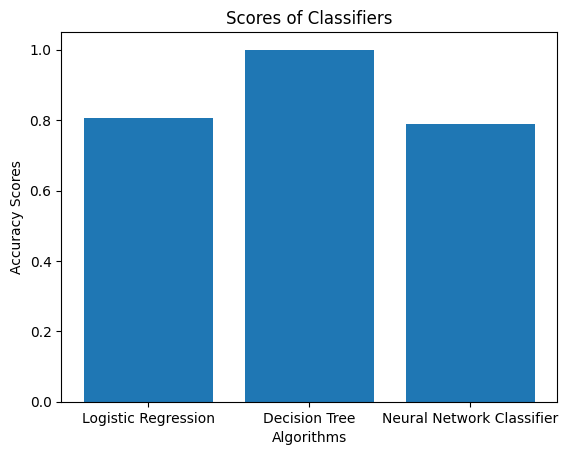

In [26]:
# Accuracy comparison with bar chart
classifier = ['Logistic Regression', 'Decision Tree', 'Neural Network Classifier']
range = [score1, score2, score3]
plt.bar(classifier, range)
plt.title('Scores of Classifiers')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.show()

Building a Predictive System

In [31]:
input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
